<a href="https://colab.research.google.com/github/Volks44/Proj_Lab1/blob/main/3_MobileNet_%26_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install np_utils --quiet
import keras
from keras.datasets import cifar10
import np_utils as np_utils
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import numpy as np
from matplotlib import pyplot
from keras.models import Sequential
import tensorflow as tf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# Classes division
classes_for_clas = [0, 1, 2, 3, 4, 5]
classes_for_clus = [6,7,8,9]

# Filtering the data for classification
train_mask = np.isin(train_labels, classes_for_clas).flatten()
test_mask = np.isin(test_labels, classes_for_clas).flatten()

x_train_clas = train_images[train_mask]
y_train_clas = train_labels[train_mask]

x_test_clas = test_images[test_mask]
y_test_clas = test_labels[test_mask]

# Filtering the data for clustering
train_mask = np.isin(train_labels, classes_for_clus).flatten()
test_mask = np.isin(test_labels, classes_for_clus).flatten()

x_train_clus = train_images[train_mask]
y_train_clus = train_labels[train_mask]

x_test_clus = test_images[test_mask]
y_test_clus = test_labels[test_mask]

In [ ]:
x_train_clas = x_train_clas.astype('float32')/255
x_test_clas = x_test_clas.astype('float32')/255

# one-hot encode the labels
num_classes = len(np.unique(y_train_clas))
y_train_clas = keras.utils.to_categorical(y_train_clas, num_classes)
y_test_clas = keras.utils.to_categorical(y_test_clas, num_classes)

# break training set into training and validation sets
(x_train_clas, x_valid_clas) = x_train_clas[5000:], x_train_clas[:5000]
(y_train_clas, y_valid_clas) = y_train_clas[5000:], y_train_clas[:5000]

# print shape of training set
print('x_train shape:', x_train_clas.shape)

# print number of training, validation, and test images
print(x_train_clas.shape[0], 'train samples')
print(x_test_clas.shape[0], 'test samples')
print(x_valid_clas.shape[0], 'validation samples')

x_train shape: (25000, 32, 32, 3)
25000 train samples
6000 test samples
5000 validation samples


In [ ]:
from keras.applications import MobileNet

base_model = MobileNet(include_top=False, weights='imagenet',
            input_shape=(32,32,3), classes=y_train_clas.shape[1])

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
#Adding layers to base model of MobileNet

model = Sequential()

#Creating base layer of VGG19
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())

#Adding the Dense Layers and Dropout
model.add(Dense(512,activation=('relu')))

model.add(Dense(256,activation=('relu')))

model.add(Dropout(.3))

model.add(Dense(128,activation=('relu')))

model.add(Dropout(.2))

model.add(Dense(6,activation=('softmax')))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 1, 1, 1024)        3228864   
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 1, 1, 1024)        0         
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                        

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
# training
batch_size = 64
epochs=10

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
              metrics = ['accuracy'])

history = model.fit(x_train_clas, y_train_clas, batch_size = batch_size, epochs = epochs,
                 validation_split = 0.1)

Epoch 1/10
352/352 [==============================] - 39s 21ms/step - loss: 1.1183 - accuracy: 0.5811 - val_loss: 0.7957 - val_accuracy: 0.7056
Epoch 2/10
352/352 [==============================] - 6s 17ms/step - loss: 0.7442 - accuracy: 0.7393 - val_loss: 0.6450 - val_accuracy: 0.7648
Epoch 3/10
352/352 [==============================] - 6s 17ms/step - loss: 0.6380 - accuracy: 0.7807 - val_loss: 0.6637 - val_accuracy: 0.7572
Epoch 4/10
352/352 [==============================] - 6s 18ms/step - loss: 0.5571 - accuracy: 0.8126 - val_loss: 0.5701 - val_accuracy: 0.8056
Epoch 5/10
352/352 [==============================] - 6s 16ms/step - loss: 0.5004 - accuracy: 0.8304 - val_loss: 0.6715 - val_accuracy: 0.7696
Epoch 6/10
352/352 [==============================] - 7s 19ms/step - loss: 0.4590 - accuracy: 0.8470 - val_loss: 0.6821 - val_accuracy: 0.7784
Epoch 7/10
352/352 [==============================] - 6s 17ms/step - loss: 0.4199 - accuracy: 0.8611 - val_loss: 0.5893 - val_accuracy: 0.795

In [ ]:
loss, accuracy = model.evaluate(x_valid_clas, y_valid_clas, batch_size=64)


79/79 [==============================] - 1s 8ms/step - loss: 0.6261 - accuracy: 0.7686


188/188 [==============================] - 1s 5ms/step


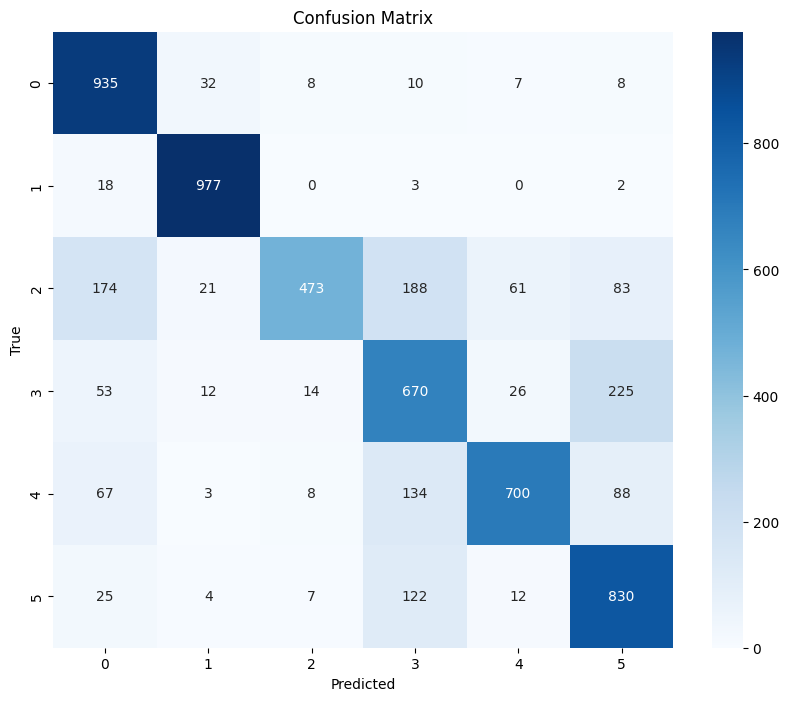


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.94      0.82      1000
           1       0.93      0.98      0.95      1000
           2       0.93      0.47      0.63      1000
           3       0.59      0.67      0.63      1000
           4       0.87      0.70      0.78      1000
           5       0.67      0.83      0.74      1000

    accuracy                           0.76      6000
   macro avg       0.79      0.76      0.76      6000
weighted avg       0.79      0.76      0.76      6000



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

# Make predictions
predictions = model.predict(x_test_clas)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test_clas, axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using seaborn
pyplot.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(6), yticklabels=np.arange(6))
pyplot.xlabel('Predicted')
pyplot.ylabel('True')
pyplot.title('Confusion Matrix')
pyplot.show()

# Print classification report
class_report = classification_report(true_labels, predicted_labels)
print("\nClassification Report:")
print(class_report)

Clustering

In [ ]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [ ]:
X = x_train_clus.reshape(x_train_clus.shape[0], -1)
y = y_train_clus.reshape(-1)

In [ ]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30)
X_tsne = tsne.fit_transform(X)

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_tsne)
y_predX_tsne = kmeans.predict(X_tsne)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


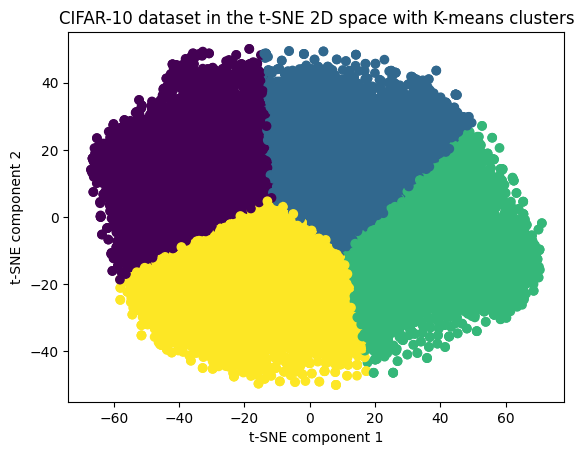

In [ ]:
from matplotlib import pyplot
pyplot.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_predX_tsne)
pyplot.xlabel('t-SNE component 1')
pyplot.ylabel('t-SNE component 2')
pyplot.title('CIFAR-10 dataset in the t-SNE 2D space with K-means clusters')
pyplot.show()